<a href="https://colab.research.google.com/github/TonnBH/APPML_Projects/blob/main/DSAProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from google.colab import files

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_Projects/DSA/Datasets/dataset.csv', sep=',',
                   on_bad_lines='skip')

In [ ]:
data.memory_usage(deep= True)

Index              128
ID_Pedido       688700
Data_Pedido     649900
ID_Cliente      630500
Segmento        638623
Pais            679000
Cidade          643322
Estado          635314
ID_Produto      698400
Categoria       677100
SubCategoria    622609
Valor_Venda      77600
dtype: int64

In [ ]:
data.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

Otimizando Memoria

In [ ]:
data['ID_Pedido'] = data['ID_Pedido'].astype ('category')
data['Data_Pedido'] = data['Data_Pedido'].astype ('category')
data['ID_Cliente'] = data['ID_Cliente'].astype ('category')
data['Segmento'] = data['Segmento'].astype ('category')
data['Pais'] = data['Pais'].astype ('category')
data['Cidade'] = data['Cidade'].astype ('category')
data['Estado'] = data['Estado'].astype ('category')
data['ID_Produto'] = data['ID_Produto'].astype ('category')
data['Categoria'] = data['Categoria'].astype ('category')
data['SubCategoria'] = data['SubCategoria'].astype ('category')

In [ ]:
data.memory_usage(deep= True)

Index              128
ID_Pedido       497590
Data_Pedido     134606
ID_Cliente      104009
Segmento         10007
Pais              9878
Cidade           70729
Estado           13995
ID_Produto      219480
Categoria        10013
SubCategoria     11353
Valor_Venda      77600
dtype: int64

In [ ]:
data.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
data.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [ ]:
data['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [ ]:
data[data.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [ ]:
data.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [ ]:
data_01 = data[data['Categoria'] == 'Office Supplies']
data_01_total = data_01.groupby('Cidade')['Valor_Venda'].sum()
cidade_maior_venda = data_01_total.idxmax()
print("Cidade Com o Maior Valor Venda de Office Suolies :", cidade_maior_venda)

Cidade Com o Maior Valor Venda de Office Suolies : New York City


In [ ]:
data_01_total.sort_values(ascending=False)

Cidade
New York City     68362.814
Los Angeles       47098.100
San Francisco     41771.198
Seattle           34856.878
Philadelphia      29313.687
                    ...    
Cedar Rapids          0.000
Kissimmee             0.000
Normal                0.000
Glenview              0.000
Mount Pleasant        0.000
Name: Valor_Venda, Length: 528, dtype: float64

Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

In [ ]:
data_02 = data.groupby('Data_Pedido')['Valor_Venda'].sum()
data_02.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

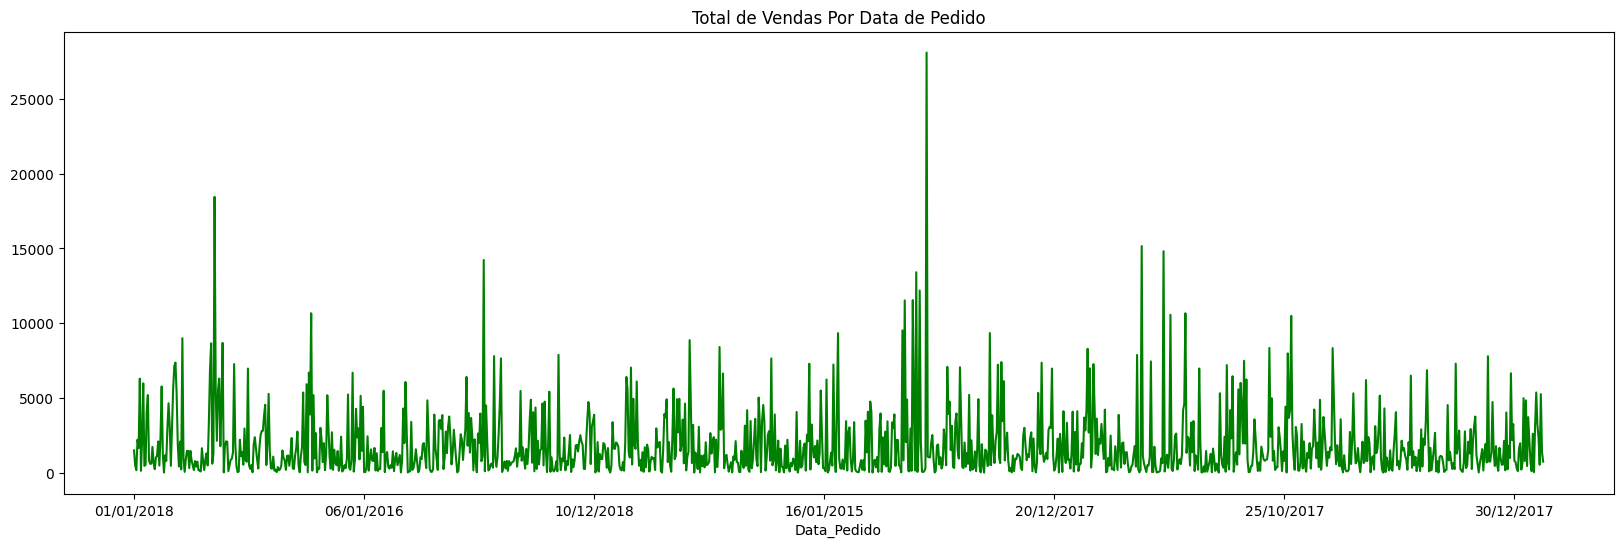

In [ ]:
plt.figure(figsize=(20,6))
data_02.plot(x = 'Data Pedido', y= 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data de Pedido')
plt.show()

Qual o Total de Vendas por Estado?Demonstre o resultado através de um gráfico de barras

In [ ]:
data_03 = data.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [ ]:
cor = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len("Estado")))

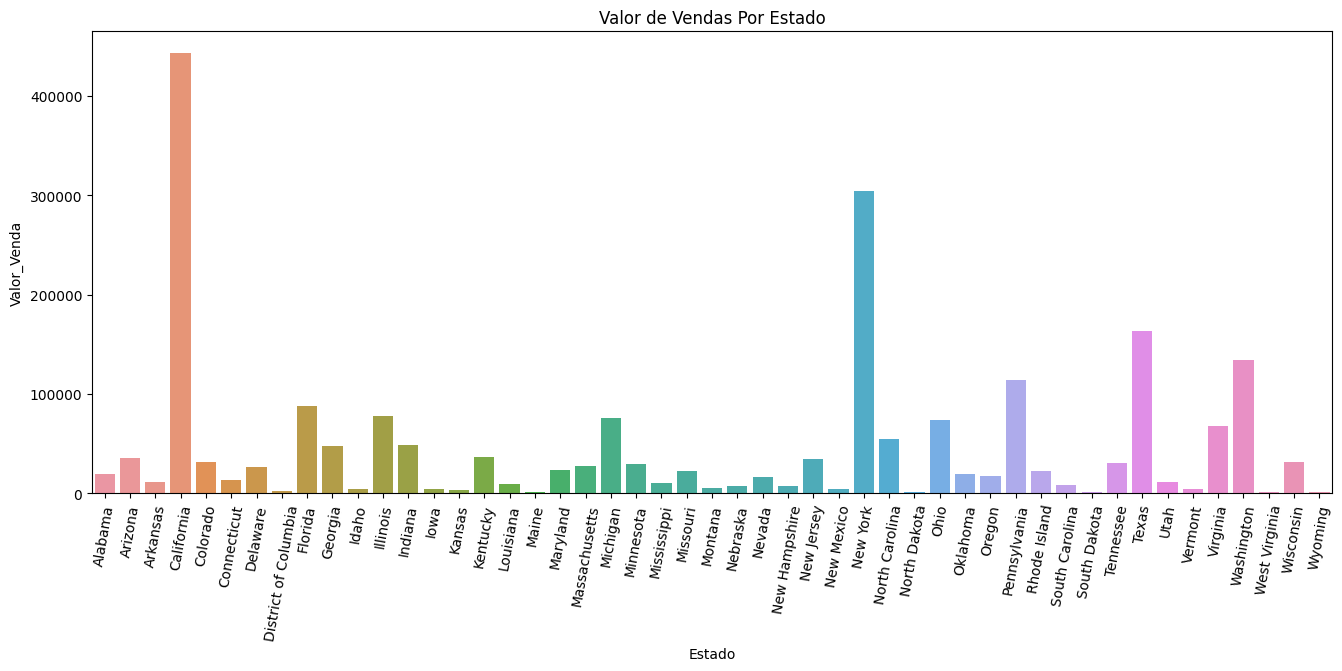

In [ ]:
plt.figure(figsize= (16,6))
sns.barplot(data = data_03, y = 'Valor_Venda', x = 'Estado').set(title =  'Valor de Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

In [ ]:
data_04 = data.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)

In [ ]:
data_04.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05
